In [1]:
from IPython.display import HTML, display
def set_css():
    display(HTML(''' <style> pre { white-space: pre-wrap; } </style> '''))
    get_ipython().events.register('pre_run_cell', set_css)

In [2]:
import pandas as pd

In [3]:
# read data, update to 1 based index
df_data = pd.read_csv('train.csv')
df_data.index += 1

In [8]:
len(df_data)

891

In [11]:
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_data['Ticket'].unique()[:5]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450'],
      dtype=object)

In [26]:
len(df_data[((df_data['Survived'] == 1) & (df_data['Embarked'] == 'S'))])

217

<Axes: ylabel='Frequency'>

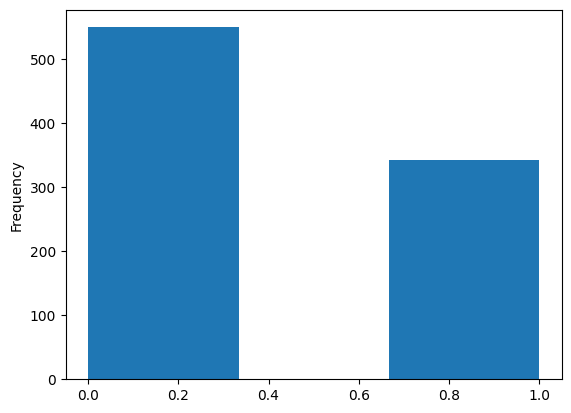

In [31]:
df_data['Survived'].plot.hist(bins=3)

<Axes: xlabel='Embarked'>

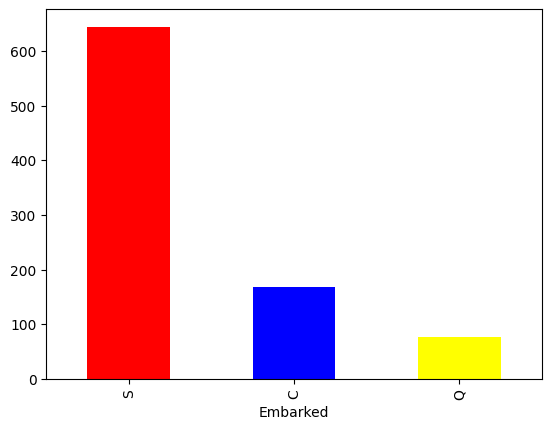

In [46]:
df_data['Embarked'].value_counts().plot(kind='bar', color=['red', 'blue', 'yellow'])

In [5]:
df_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: >

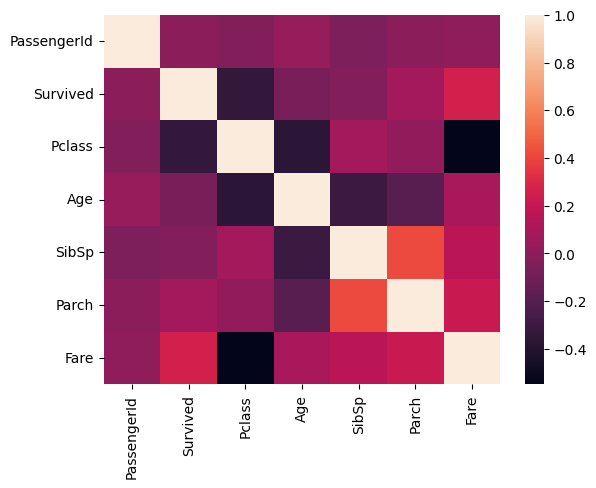

In [9]:
import seaborn as sns
%matplotlib inline
numeric_columns_list = [
    "PassengerId",
    "Survived",
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare"
    ]
# calculate the correlation matrix on the numeric columns
corr = df_data.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [10]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


In [4]:
from itertools import combinations

features_set = {'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'}
list_combinations = list()

for n in range(len(features_set) + 1):
    list_combinations += list(combinations(features_set, n))
print(f'All combinations of eligible features: {list_combinations}')

All combinations of eligible features: [(), ('Age',), ('Sex',), ('Pclass',), ('SibSp',), ('Parch',), ('Fare',), ('Age', 'Sex'), ('Age', 'Pclass'), ('Age', 'SibSp'), ('Age', 'Parch'), ('Age', 'Fare'), ('Sex', 'Pclass'), ('Sex', 'SibSp'), ('Sex', 'Parch'), ('Sex', 'Fare'), ('Pclass', 'SibSp'), ('Pclass', 'Parch'), ('Pclass', 'Fare'), ('SibSp', 'Parch'), ('SibSp', 'Fare'), ('Parch', 'Fare'), ('Age', 'Sex', 'Pclass'), ('Age', 'Sex', 'SibSp'), ('Age', 'Sex', 'Parch'), ('Age', 'Sex', 'Fare'), ('Age', 'Pclass', 'SibSp'), ('Age', 'Pclass', 'Parch'), ('Age', 'Pclass', 'Fare'), ('Age', 'SibSp', 'Parch'), ('Age', 'SibSp', 'Fare'), ('Age', 'Parch', 'Fare'), ('Sex', 'Pclass', 'SibSp'), ('Sex', 'Pclass', 'Parch'), ('Sex', 'Pclass', 'Fare'), ('Sex', 'SibSp', 'Parch'), ('Sex', 'SibSp', 'Fare'), ('Sex', 'Parch', 'Fare'), ('Pclass', 'SibSp', 'Parch'), ('Pclass', 'SibSp', 'Fare'), ('Pclass', 'Parch', 'Fare'), ('SibSp', 'Parch', 'Fare'), ('Age', 'Sex', 'Pclass', 'SibSp'), ('Age', 'Sex', 'Pclass', 'Parch')

In [6]:
# drop Nan values for all features
# all features
print(f'Total rows {len(df_data)}')
data_nonan_all_features = df_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna(
    subset=[
        'Survived',
        'Pclass',
        'Sex',
        'Age',
        'SibSp',
        'Parch',
        'Fare'
    ]
)
print(f'Total rows after Nan removal {len(data_nonan_all_features)}')

print(f"Total rows with Nan values\n{df_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].isna().sum()}")

Total rows 891
Total rows after Nan removal 714
Total rows with Nan values
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split


split_seed = 0
data_nonan_all_features_dummies = pd.get_dummies(data_nonan_all_features, columns=['Pclass', 'Sex', 'Survived'], drop_first=True, dtype=int) 
x_train, x_test, y_train, y_test = train_test_split(
    data_nonan_all_features_dummies.drop('Survived_1', axis=1),
    data_nonan_all_features_dummies['Survived_1'],
    train_size=.8,
    random_state=split_seed
)
print(x_train, x_test, y_train, y_test)

      Age  SibSp  Parch      Fare  Pclass_2  Pclass_3  Sex_male
388  36.0      0      0   13.0000         1         0         0
686  25.0      1      2   41.5792         1         0         1
21   35.0      0      0   26.0000         1         0         1
332  45.5      0      0   28.5000         0         0         1
397  31.0      0      0    7.8542         0         1         0
..    ...    ...    ...       ...       ...       ...       ...
884  28.0      0      0   10.5000         1         0         1
239  19.0      0      0   10.5000         1         0         1
790  46.0      0      0   79.2000         0         0         1
705  26.0      1      0    7.8542         0         1         1
857  45.0      1      1  164.8667         0         0         0

[571 rows x 7 columns]        Age  SibSp  Parch      Fare  Pclass_2  Pclass_3  Sex_male
424  28.00      1      1   14.4000         0         1         0
178  50.00      0      0   28.7125         0         0         0
306   0.92   

In [8]:
# train model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train, y_train.values.ravel())

G:\My Drive\programacao\projetos\regressao-logistica\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
import random
from pandas import DataFrame



def _remove_nan(df: DataFrame, columns: list=('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare')) -> DataFrame:
    # drop Nan values for all features
    # all features
    print(f'Total rows {len(df_data)}')
    data_nonan_all_features = df_data[columns].dropna(
        subset=[
            'Survived',
            'Pclass',
            'Sex',
            'Age',
            'SibSp',
            'Parch',
            'Fare'
        ]
    )
    print(f'Total rows after Nan removal {len(data_nonan_all_features)}')
    print(f"Total rows with Nan values\n{df_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].isna().sum()}")
    return data_nonan_all_features


# test_df = _remove_nan(test_df)
#print(x_train_all_features_dummy.iloc[random.randrange(len(x_train_all_features_dummy))])
s = 4
random.seed(s)
print(x_test.iloc[[random.randrange(len(x_test))], :])
random.seed(s)
print(logreg.predict(x_test.iloc[[random.randrange(len(x_test))], :])[0])
random.seed(s)
print(y_test.iloc[[random.randrange(len(y_test))]])

      Age  SibSp  Parch      Fare  Pclass_2  Pclass_3  Sex_male
333  38.0      0      1  153.4625         0         0         1
1
333    0
Name: Survived_1, dtype: int32


In [10]:
print(f"Score for logistic regression {logreg.score(x_test, y_test)}")

Score for logistic regression 0.8461538461538461


In [17]:
#[i/100 for i in range(101)]


logreg_proba = logreg.predict_proba(x_test)
dict_y_pred_cutoff = {cutoff/1e2: {'y_pred_cutoff': (logreg_proba >= cutoff / 1e2).astype(int)[:, 1]} for cutoff in range(101)}
dict_y_pred_cutoff

{0.0: {'y_pred_cutoff': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])},
 0.01: {'y_pred_cutoff': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1

In [ ]:
# plot subplots increasing cutoffs to see it's distribution
# for j in a:
#      histog = plt.hist(j)
#      plt.show()

In [18]:
from collections import defaultdict

dict_scores_cutoff = defaultdict(list)
dict_scores_cutoff = {'cutoffs': [*dict_y_pred_cutoff.keys()]}
dict_scores_cutoff

{'cutoffs': [0.0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14,
  0.15,
  0.16,
  0.17,
  0.18,
  0.19,
  0.2,
  0.21,
  0.22,
  0.23,
  0.24,
  0.25,
  0.26,
  0.27,
  0.28,
  0.29,
  0.3,
  0.31,
  0.32,
  0.33,
  0.34,
  0.35,
  0.36,
  0.37,
  0.38,
  0.39,
  0.4,
  0.41,
  0.42,
  0.43,
  0.44,
  0.45,
  0.46,
  0.47,
  0.48,
  0.49,
  0.5,
  0.51,
  0.52,
  0.53,
  0.54,
  0.55,
  0.56,
  0.57,
  0.58,
  0.59,
  0.6,
  0.61,
  0.62,
  0.63,
  0.64,
  0.65,
  0.66,
  0.67,
  0.68,
  0.69,
  0.7,
  0.71,
  0.72,
  0.73,
  0.74,
  0.75,
  0.76,
  0.77,
  0.78,
  0.79,
  0.8,
  0.81,
  0.82,
  0.83,
  0.84,
  0.85,
  0.86,
  0.87,
  0.88,
  0.89,
  0.9,
  0.91,
  0.92,
  0.93,
  0.94,
  0.95,
  0.96,
  0.97,
  0.98,
  0.99,
  1.0]}

In [19]:
from sklearn.metrics import confusion_matrix
from collections import defaultdict
import numpy as np


dict_scores_cutoff = defaultdict(list)
dict_scores_cutoff['cutoffs'] = [*dict_y_pred_cutoff.keys()]


def confusion_matrix_scorer(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]}


for cutoff, dict_cutoff in dict_y_pred_cutoff.items():
    cm = confusion_matrix_scorer(y=y_test, y_pred=dict_cutoff['y_pred_cutoff'])
    dict_scores_cutoff['tn'].append(cm['tn'])
    dict_scores_cutoff['tp'].append(cm['tp'])
    dict_scores_cutoff['fn'].append(cm['fn'])
    dict_scores_cutoff['fp'].append(cm['fp'])
    
# dict_y_pred_cutoff
dict_scores_cutoff = {key: np.array(value) for key, value in dict_scores_cutoff.items()}
dict_scores_cutoff['sensitivity'] = dict_scores_cutoff['tp'] / (dict_scores_cutoff['tp'] + dict_scores_cutoff['fn'])
dict_scores_cutoff['specificity'] = dict_scores_cutoff['tn'] / (dict_scores_cutoff['tn'] + dict_scores_cutoff['fp'])
dict_scores_cutoff

{'cutoffs': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 'tn': array([ 0,  0,  0,  0,  1,  2,  4,  6, 11, 15, 20, 23, 25, 28, 29, 33, 39,
        43, 43, 43, 44, 44, 47, 49, 50, 51, 53, 54, 54, 55, 55, 55, 55, 58,
        59, 59, 59, 59, 62, 63, 63, 63, 63, 63, 64, 65, 67, 67, 68, 68, 69,
        70, 70, 70, 70, 70, 71, 71, 71, 72, 72, 73, 73, 73, 73, 73,

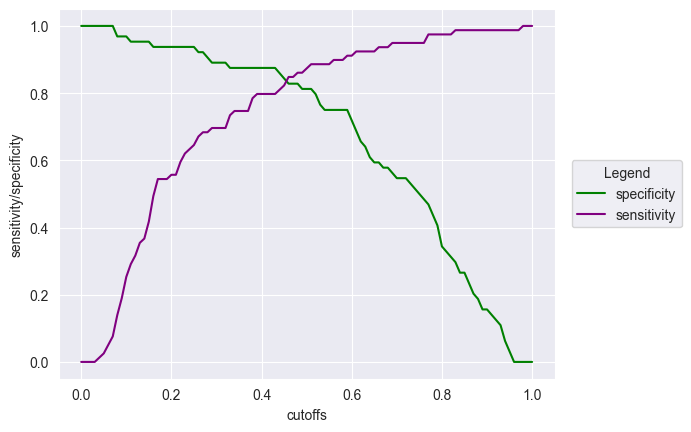

In [27]:
from matplotlib import pyplot as plt

x = dict_scores_cutoff['cutoffs']
y1 = dict_scores_cutoff['sensitivity']
y2 = dict_scores_cutoff['specificity']
plt.plot(x, y1, color='g', label='specificity')
plt.plot(x, y2, color='purple', label='sensitivity')
plt.xlabel('cutoffs')
plt.ylabel('sensitivity/specificity')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')
plt.show()

In [20]:
y_pred = logreg.predict(x_test)
print(y_pred)

[0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)